<a href="https://colab.research.google.com/github/kvinne-anc/Statistics-and-Probability/blob/master/T_Test_Voting_Data_Y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
vote = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)
vote.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [ ]:
vote.columns = ['Party', 'handicapped-infant', 'water-project', 'budget-resolution', 'physician-fee', 'el-salvador', 'religious-groups', 'anti-satellite', 'aid-to-nicaragua', 'mx-missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty-free-export', 'south-africa']
vote.head()

,Party,handicapped-infant,water-project,budget-resolution,physician-fee,el-salvador,religious-groups,anti-satellite,aid-to-nicaragua,mx-missile,immigration,synfuels,education,superfund,crime,duty-free-export,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [ ]:
votes = vote.replace('?',0)
votes

,Party,handicapped-infant,water-project,budget-resolution,physician-fee,el-salvador,religious-groups,anti-satellite,aid-to-nicaragua,mx-missile,immigration,synfuels,education,superfund,crime,duty-free-export,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,0,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,0
2,democrat,0,y,y,0,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,0,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,0,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,0,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,0,0,0,0,n,y,y,y,n,y


In [ ]:
votes1 = votes.replace('y',1)
votes1

,Party,handicapped-infant,water-project,budget-resolution,physician-fee,el-salvador,religious-groups,anti-satellite,aid-to-nicaragua,mx-missile,immigration,synfuels,education,superfund,crime,duty-free-export,south-africa
0,republican,n,1,n,1,1,1,n,n,n,1,0,1,1,1,n,1
1,republican,n,1,n,1,1,1,n,n,n,n,n,1,1,1,n,0
2,democrat,0,1,1,0,1,1,n,n,n,n,1,n,1,1,n,n
3,democrat,n,1,1,n,0,1,n,n,n,n,1,n,1,n,n,1
4,democrat,1,1,1,n,1,1,n,n,n,n,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,1,1,1,1,n,n,1,1,n,1,1,1,n,1
431,democrat,n,n,1,n,n,n,1,1,1,1,n,n,n,n,n,1
432,republican,n,0,n,1,1,1,n,n,n,n,1,1,1,1,n,1
433,republican,n,n,n,1,1,1,0,0,0,0,n,1,1,1,n,1


In [ ]:
votes2 = votes1.replace('n',2)
votes2

,Party,handicapped-infant,water-project,budget-resolution,physician-fee,el-salvador,religious-groups,anti-satellite,aid-to-nicaragua,mx-missile,immigration,synfuels,education,superfund,crime,duty-free-export,south-africa
0,republican,2,1,2,1,1,1,2,2,2,1,0,1,1,1,2,1
1,republican,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,0
2,democrat,0,1,1,0,1,1,2,2,2,2,1,2,1,1,2,2
3,democrat,2,1,1,2,0,1,2,2,2,2,1,2,1,2,2,1
4,democrat,1,1,1,2,1,1,2,2,2,2,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,2,2,1,1,1,1,2,2,1,1,2,1,1,1,2,1
431,democrat,2,2,1,2,2,2,1,1,1,1,2,2,2,2,2,1
432,republican,2,0,2,1,1,1,2,2,2,2,1,1,1,1,2,1
433,republican,2,2,2,1,1,1,0,0,0,0,2,1,1,1,2,1


In [ ]:
# 1 vote1 = np.where(votes['Party', 'handicapped-infant', 'water-project', 'budget-resolution', 'physician-fee', 'el-salvador', 'religious-groups', 'anti-satellite', 'aid-to-nicaragua', 'mx-missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty-free-export', 'south-africa']=='y', 1, 2)
#np.where is supposed to be able to recode these but I'm getting an error so doing this a diff way to move on 

In [ ]:
reps = votes2[votes2['Party'] == 'republican'] 
reps.head()

,Party,handicapped-infant,water-project,budget-resolution,physician-fee,el-salvador,religious-groups,anti-satellite,aid-to-nicaragua,mx-missile,immigration,synfuels,education,superfund,crime,duty-free-export,south-africa
0,republican,2,1,2,1,1,1,2,2,2,1,0,1,1,1,2,1
1,republican,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,0
7,republican,2,1,2,1,1,1,2,2,2,2,2,2,1,1,0,1
8,republican,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,1
10,republican,2,1,2,1,1,2,2,2,2,2,0,0,1,1,2,2


In [ ]:
dems = votes2[votes2['Party'] == 'democrat'] 
dems.head()

,Party,handicapped-infant,water-project,budget-resolution,physician-fee,el-salvador,religious-groups,anti-satellite,aid-to-nicaragua,mx-missile,immigration,synfuels,education,superfund,crime,duty-free-export,south-africa
2,democrat,0,1,1,0,1,1,2,2,2,2,1,2,1,1,2,2
3,democrat,2,1,1,2,0,1,2,2,2,2,1,2,1,2,2,1
4,democrat,1,1,1,2,1,1,2,2,2,2,1,0,1,1,1,1
5,democrat,2,1,1,2,1,1,2,2,2,2,2,2,1,1,1,1
6,democrat,2,1,2,1,1,1,2,2,2,2,2,2,0,1,1,1


In [ ]:
comprwi = pd.crosstab(reps['water-project'], reps['immigration'], normalize='index')

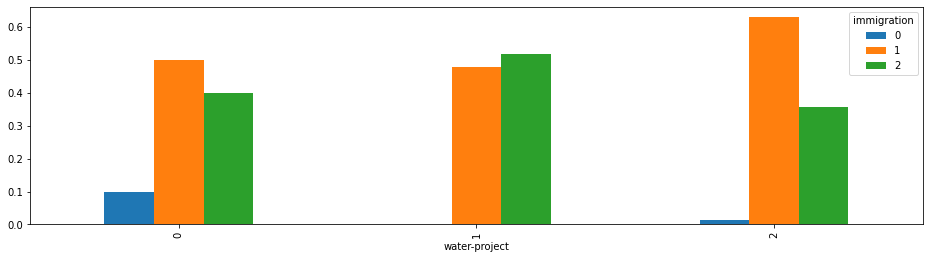

In [ ]:
comprwi.plot(kind='bar', figsize=(16,4))

In [ ]:
from scipy.stats import ttest_ind, ttest_1samp

In [ ]:
ttest_ind(reps['duty-free-export'], dems['duty-free-export'])


Ttest_indResult(statistic=8.82356366034453, pvalue=2.7523396228383476e-17)

In [ ]:
ttest_ind(reps['water-project'], dems['water-project'], nan_policy='omit')

Ttest_indResult(statistic=-0.3862777067783321, pvalue=0.6994807447313953)

In [ ]:
ttest_ind(reps['el-salvador'], reps['education'], nan_policy='omit')

Ttest_indResult(statistic=-0.3021287324563474, pvalue=0.7627419767811441)

In [ ]:
ttest_ind(reps['immigration'], dems['immigration'])

Ttest_indResult(statistic=-1.704668640972695, pvalue=0.08897355998783181)

In [ ]:
ttest_ind(reps['education'], dems['education'])

Ttest_indResult(statistic=-13.213073701493068, pvalue=1.001056996791123e-33)

In [ ]:
#Generate and numerically represent a confidence interval
#Graphically (with a plot) represent the confidence interval
#Interpret the confidence interval - 
#what does it tell you about the data and its distribution?

In [ ]:
meanr = np.mean(reps)
meansr = pd.DataFrame({'single_sample' : meanr})
meansr.head()

,single_sample
handicapped-infant,1.779762
water-project,1.315476
budget-resolution,1.821429
physician-fee,0.994048
el-salvador,1.029762


In [ ]:
meand = np.mean(dems)
meansd = pd.DataFrame({'single_sample' : meand})
meansd.head()

,single_sample
handicapped-infant,1.348315
water-project,1.340824
budget-resolution,1.082397
physician-fee,1.887640
el-salvador,1.704120


In [ ]:
import scipy
from scipy import stats
confidence = 0.95 


In [ ]:
def conf_int(meansr, confidence=0.95):
  repsA = np.array(meansr)
  mean = np.mean(meansr)
  n = len(meansr)
  std_err = np.std(meansr, ddof=1)/np.sqrt(n)
  margin = std_err*stats.t.ppf((1 + confidence)/2, n-1)
  return (mean, mean - margin, mean + margin)

In [ ]:
#meansr is our new dataframe made of all the means of the republican votes 
#defining confidence interval using this new dataframe 
#convert to an array 
#length, standard error, margin of error 
#don't forget to import stats from scipy 
#follows the mathematical equation 

In [ ]:
conf_int(meansr)

(single_sample    1.407366
 dtype: float64, single_sample    1.219217
 dtype: float64, single_sample    1.595515
 dtype: float64)

In [ ]:
#graphing the confidence interval 
#note - ppf is a component used to calculate the confidence interval 

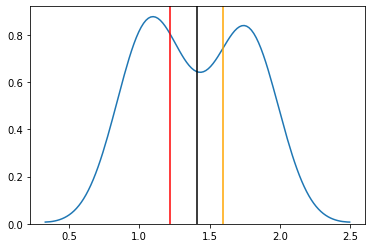

In [ ]:
sns.kdeplot(meanr);
#accidentally using meansr returns error because it's a single sample 
CI = conf_int(meanr)
plt.axvline(x=CI[1], color='red');
plt.axvline(x=CI[2], color='orange');
plt.axvline(x=CI[0], color='black');

#red and orange are the upper and lower bounds of the CI, black is known sample mean
#ie either side of the mean is a confidence interval 
#either side is range of high to low

In [ ]:
#Interpret confidence interval: what can it tell us about the distribution of data
#The mean is inside the bounds of the confidence interval which means that it fails 
#to reject our null hypothesis (high p value) - confidence - representative of the population 
#if it had fallen outside the bounds then it would reject our null hypothesis (low p value) - nonrepresentative of the population
#

In [ ]:
from scipy.stats import t, ttest_1samp
#t.interval is a built in function that can calc CI

In [ ]:

n = len(meanr)
dof = n-1
meanx = np.mean(meanr)
std = np.std(meanr, ddof=1)
std_err = std/n**.5

CI = t.interval(.95, dof, loc=meanx, scale=std_err)
print(meanx, CI)


1.4073660714285714 (1.219216679879794, 1.5955154629773487)


In [ ]:
#Take a dataset that we have used in the past in class that has categorical variables. 
#Pick two of those categorical variables and run a chi-squared tests on that data
#By hand using Numpy
#In a single line using Scipy

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'
flags = pd.read_csv(url, header=None)
flags.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [ ]:
flags.columns = ['country', 'A', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'color_1', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'color_2', 'color_3']
flags.head()

,country,A,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,color_1,q,r,s,t,u,v,w,x,y,z,color_2,color_3
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [ ]:
Flag1 = flags.drop(['A', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], axis=1)
Flag1.head()

,country,color_1,color_2,color_3
0,Afghanistan,green,black,green
1,Albania,red,red,red
2,Algeria,green,green,white
3,American-Samoa,blue,blue,red
4,Andorra,gold,blue,red


In [ ]:
#run a chi squared test on two cats

In [ ]:
Flag1.describe()

,country,color_1,color_2,color_3
count,194,194,194,194
unique,194,8,7,8
top,Mongolia,red,red,red
freq,1,71,56,69


In [ ]:
Flag1['color_1'].value_counts()

red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: color_1, dtype: int64

In [ ]:
xtab = pd.crosstab(Flag1['color_1'], Flag1['color_2'], margins = True)
xtab

color_2,black,blue,gold,green,orange,red,white,All
color_1,,,,,,,,
black,3,0,0,0,0,2,0,5
blue,0,24,0,1,0,2,13,40
brown,0,1,0,0,0,0,1,2
gold,3,3,4,3,0,4,2,19
green,2,2,1,23,0,2,1,31
orange,0,0,0,0,4,0,0,4
red,4,9,1,3,0,44,10,71
white,0,4,0,2,0,2,14,22
All,12,43,6,32,4,56,41,194


In [ ]:
rs = xtab.iloc[0].sum()
rs
#row sums - not sure this is relevant or correct here 

10

In [ ]:
cs = xtab.iloc[2].sum()
cs

4

In [ ]:
All = xtab.loc['All', 'All']
All
#total of one color 

194

In [ ]:
#expected value calculation 
#comes out as numpy array, change to dataframe 

In [ ]:
expected = []
for i in range(len(rs)):
  expected_row=[]
  for column in cs:
    expected_val = column*rs[i]/All
    expected_row.append(expected_val)
  expected.append(expected_row)
expected

TypeError: ignored

In [ ]:
expected_a = pd.DataFrame(expected)
expected_a

,0,1,2,3,4,5,6
0,0.0,0.015464,0.0,0.0,0.0,0.0,0.015464
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.010309,0.0,0.0,0.0,0.0,0.010309
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [ ]:
xtab

color_2,black,blue,gold,green,orange,red,white,All
color_1,,,,,,,,
black,3,0,0,0,0,2,0,5
blue,0,24,0,1,0,2,13,40
brown,0,1,0,0,0,0,1,2
gold,3,3,4,3,0,4,2,19
green,2,2,1,23,0,2,1,31
orange,0,0,0,0,4,0,0,4
red,4,9,1,3,0,44,10,71
white,0,4,0,2,0,2,14,22
All,12,43,6,32,4,56,41,194


In [ ]:
observed = pd.crosstab(Flag1['color_1'], Flag1['color_2']).values
observed

array([[ 3,  0,  0,  0,  0,  2,  0],
       [ 0, 24,  0,  1,  0,  2, 13],
       [ 0,  1,  0,  0,  0,  0,  1],
       [ 3,  3,  4,  3,  0,  4,  2],
       [ 2,  2,  1, 23,  0,  2,  1],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 4,  9,  1,  3,  0, 44, 10],
       [ 0,  4,  0,  2,  0,  2, 14]])

In [ ]:
observed_b = pd.DataFrame(observed)
observed_b

,0,1,2,3,4,5,6
0,3,0,0,0,0,2,0
1,0,24,0,1,0,2,13
2,0,1,0,0,0,0,1
3,3,3,4,3,0,4,2
4,2,2,1,23,0,2,1
5,0,0,0,0,4,0,0
6,4,9,1,3,0,44,10
7,0,4,0,2,0,2,14


In [ ]:
#comparing expected even distr to the observed uneven distr using a chi sqr stat
#Numpy first 

In [ ]:
chi_sqr = ((observed_b - expected_a)**2/(expected_a)).sum()
chi_sqr

0    inf
1    inf
2    inf
3    inf
4    inf
5    inf
6    inf
dtype: float64

In [ ]:
#Degrees of freedom (dof) of Chi Sqr test 
#dof = (number or rows - 1)(number of columns - 1)

In [ ]:
dof = (len(rs)-1)* (len(cs)-1)
dof

36

In [ ]:
#Using scipy 

In [ ]:
stats.chi2_contingency(observed)

(431.83248068615876,
 3.718270437221462e-66,
 42,
 array([[ 0.30927835,  1.10824742,  0.15463918,  0.82474227,  0.10309278,
          1.44329897,  1.05670103],
        [ 2.4742268 ,  8.86597938,  1.2371134 ,  6.59793814,  0.82474227,
         11.54639175,  8.45360825],
        [ 0.12371134,  0.44329897,  0.06185567,  0.32989691,  0.04123711,
          0.57731959,  0.42268041],
        [ 1.17525773,  4.21134021,  0.58762887,  3.13402062,  0.39175258,
          5.48453608,  4.01546392],
        [ 1.91752577,  6.87113402,  0.95876289,  5.11340206,  0.63917526,
          8.94845361,  6.55154639],
        [ 0.24742268,  0.88659794,  0.12371134,  0.65979381,  0.08247423,
          1.15463918,  0.84536082],
        [ 4.39175258, 15.7371134 ,  2.19587629, 11.71134021,  1.46391753,
         20.49484536, 15.00515464],
        [ 1.36082474,  4.87628866,  0.68041237,  3.62886598,  0.45360825,
          6.35051546,  4.64948454]]))

In [ ]:
print('stat', stats.chi2_contingency(observed)[0])
print('pvalue', stats.chi2_contingency(observed)[1])
print('dof', stats.chi2_contingency(observed)[2])
pd.DataFrame(stats.chi2_contingency(observed)[3])

stat 431.83248068615876
pvalue 3.718270437221462e-66
dof 42


,0,1,2,3,4,5,6
0,0.309278,1.108247,0.154639,0.824742,0.103093,1.443299,1.056701
1,2.474227,8.865979,1.237113,6.597938,0.824742,11.546392,8.453608
2,0.123711,0.443299,0.061856,0.329897,0.041237,0.577320,0.422680
3,1.175258,4.211340,0.587629,3.134021,0.391753,5.484536,4.015464
4,1.917526,6.871134,0.958763,5.113402,0.639175,8.948454,6.551546
5,0.247423,0.886598,0.123711,0.659794,0.082474,1.154639,0.845361
6,4.391753,15.737113,2.195876,11.711340,1.463918,20.494845,15.005155
7,1.360825,4.876289,0.680412,3.628866,0.453608,6.350515,4.649485


In [ ]:
#We fail to reject the null hypothesis 